#MCI AI and Machine Learning For Begineer - Topic: Classification --Le Duyc Anh - 4/6/2025

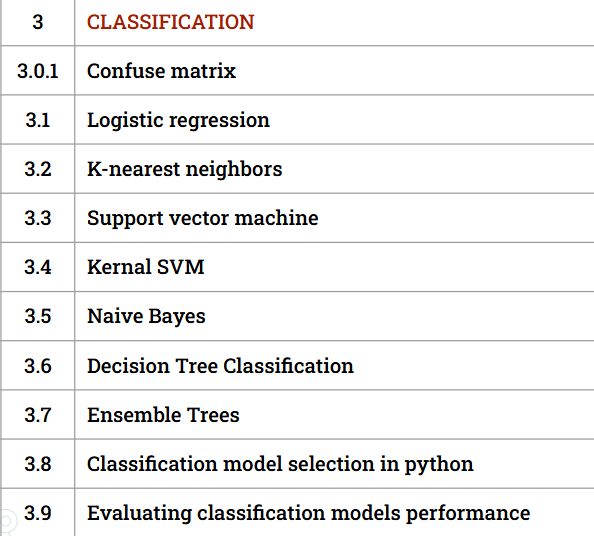

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1.Logistic Regression

##Theory

<h1>SELF EXPLAINATORY</h1>

so in database in d-dimension, we got $X_i = [x_1, x_2,...,x_n]∈R^{d×K}$ and for each points in that dimensions has a lot of factors that made it way, and in a classification of chances that is calculated with such factors. For instance, when calculating a factors that causes a student to fail his exams, we got "study/not study", "errands/no errands"... each of the sectors have points given like study = 1 -> no study = 0 and there can be values between 1 and 0 to indicate the studying frequencies for instance. And to calculate the whole, we can use multiplicity for each factors, like $ P(studying).P(errands) = y $ the product y then can dictate wheather the student can success or fail their test based on probabilities created from the multiplicity. like if it close to 1 -> chance to success is more closer to 100%, and vice versa.

this shit is like the mathematical

$$
P(y^i|x^i,θ) = (ŷ^i)^{y^t}(1-ŷ^i)^{(1-y^t)}
$$

We need to find the Θ to maximize the value of above function and this Θ called an ***optimal point***
$$
θ^* = arg\max_ΘP(y|X,θ)
$$

<h1> Logistic Regression - Binary Cross Entropy Loss and Gradient Descent

In logistic regression, we have 2 classes, so we use the **Binary Cross Entropy** loss function.

---

<h1> 🔹 Binary Cross Entropy Loss

Every value $\hat{y}^i$ or $1 - \hat{y}^i$ is lower than 1.  
Product of many such values can cause **numerical underflow**, so we take logarithms and sum the terms.

We define the **cross entropy loss** as:

$$
\mathcal{L}(\theta) = - \log P(y | X, \theta)
= - \left( y \log \hat{y} + (1 - y)\log(1 - \hat{y}) \right)
$$

For all $m$ samples:

$$
\mathcal{L}(\theta) = - \sum_{i=1}^{m} \left( y^i \log \hat{y}^i + (1 - y^i)\log(1 - \hat{y}^i) \right)
$$

---

<h1> 🔹 Optimization Objective

Instead of maximizing the log-likelihood:

$$
\theta^* = \arg\max_{\theta} P(y | X, \theta)
$$

We minimize the negative log-likelihood:

$$
\theta^* = \arg\min_{\theta} - \log P(y | X, \theta)
$$

---

<h1> 🔹 Derivative of Loss

We use the chain rule:

$$
\frac{\partial \mathcal{L}}{\partial \theta} =
\frac{\partial \mathcal{L}}{\partial \hat{y}} \cdot
\frac{\partial \hat{y}}{\partial \sigma} \cdot
\frac{\partial \sigma}{\partial \theta}
$$

Where:

 $$\hat{y} = \sigma(s)$$  
 $$\sigma(s) = \frac{1}{1 + e^{-s}}$$  
 $$\sigma'(s) = \sigma(s)(1 - \sigma(s))$$

Then:

$$
\frac{\partial \sigma}{\partial \theta} = \hat{y}(1 - \hat{y}) X
$$


and:

$$
\frac{\partial \mathcal{L}}{\partial \hat{y}} =
\frac{\hat{y} - y}{\hat{y}(1 - \hat{y})}
$$

Thus:

$$
\frac{\partial \mathcal{L}}{\partial \theta}
= (\hat{y} - y) X
$$

---

<h1> 🔹 Stochastic Gradient Descent (SGD)

For each sample $(x^i, y^i)$:

$$
\frac{\partial \mathcal{L}(\theta, x^i, y^i)}{\partial \theta} = (\hat{y}^i - y^i)x^i
$$

<h1> Update Rule:

$$
\theta = \theta - \eta (\hat{y}^i - y^i)x^i
$$

Where:
- $\eta$ is the learning rate



##Testing with python library sklearn LogisticRegression

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris_df = iris_df.drop(columns=['petal_length', 'petal_width'])
iris_df

,sepal_length,sepal_width,species
0,5.1,3.5,setosa
1,4.9,3.0,setosa
2,4.7,3.2,setosa
3,4.6,3.1,setosa
4,5.0,3.6,setosa
...,...,...,...
145,6.7,3.0,virginica
146,6.3,2.5,virginica
147,6.5,3.0,virginica
148,6.2,3.4,virginica


In [ ]:
iris_df['is_setosa'] = iris_df.species.apply(lambda x: True if x == 'setosa' else False)
iris_df

,sepal_length,sepal_width,species,is_setosa
0,5.1,3.5,setosa,True
1,4.9,3.0,setosa,True
2,4.7,3.2,setosa,True
3,4.6,3.1,setosa,True
4,5.0,3.6,setosa,True
...,...,...,...,...
145,6.7,3.0,virginica,False
146,6.3,2.5,virginica,False
147,6.5,3.0,virginica,False
148,6.2,3.4,virginica,False


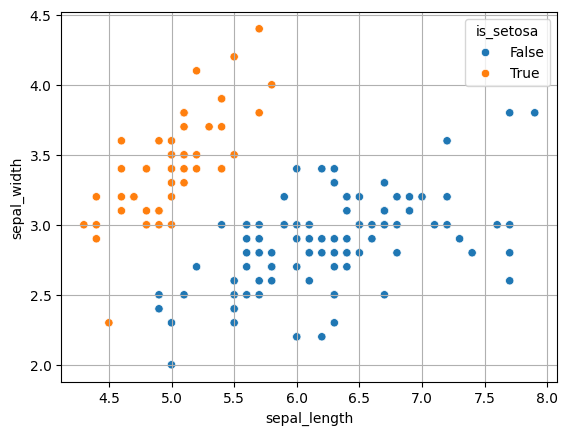

In [ ]:
sns.scatterplot(data=iris_df, x='sepal_length', y='sepal_width', hue='is_setosa');
plt.grid(True)

[[-3.38828053  3.1645602 ]]


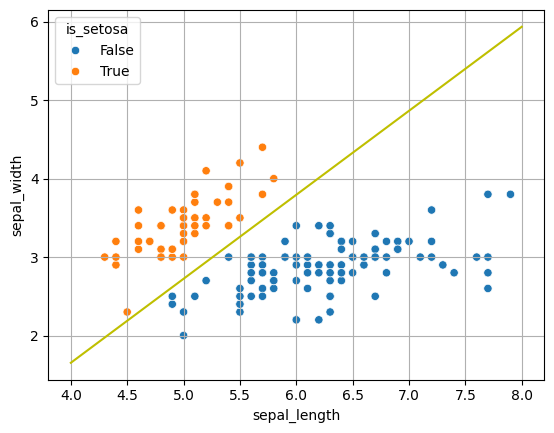

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

x = iris_df.iloc[:,:2]
y = iris_df.is_setosa

sklearn_logistic_regression_model = LogisticRegression(fit_intercept=True)
sklearn_logistic_regression_model.fit(x,y)
print(sklearn_logistic_regression_model.coef_)

w = sklearn_logistic_regression_model.coef_

w_0 = sklearn_logistic_regression_model.intercept_
w_1 = w[0][0]
w_2 = w[0][1]

sns.scatterplot(data=iris_df, x='sepal_length', y='sepal_width', hue='is_setosa')
plt.grid(True)
plt.plot()
sepal_length = np.linspace(4,8,2)
sepal_width = -w_0/w_2 + (-w_1/w_2)*sepal_length

plt.plot(sepal_length, sepal_width, "y")
plt.show()

$$w_1x_1 + w_2x_2 + w_o = 0$$
$$w_2x_2 = -w_1x_1 -w_o$$
so this is what the equation up there actually means
$$x_2 = -\frac{w_o}{w_2} - \frac{w_1}{w_2}x_1$$

with x_2 as the width and the x_1 as the length

In [ ]:
print(w_0[0], w_1, w_2)

8.323154867279907 -3.388280531554598 3.1645602042693364


meaning the borderline to be described as:

$$
y = -3.3882x_1 + 3.1646x_2 + 8.3232
$$


In [ ]:
w #this just means that the border between the two territory are represented by this line


array([[-3.38828053,  3.1645602 ]])

In [ ]:
x = iris_df.iloc[:,:2]
y = iris_df.is_setosa

y_predict = sklearn_logistic_regression_model.predict(x)
y_predict

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
sklearn_logistic_regression_model.predict(np.array([[5,5]]))

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True])

In [ ]:
sklearn_logistic_regression_model.predict(np.array( [ [5,5] , [90,10] ] ) )
#this is like, inside the predict() we got the np.array to specify
#the input as an array, and then inside there is a list of values

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([ True, False])

In [ ]:
#probablity estimates
sklearn_logistic_regression_model.predict_proba(np.array([[7,3.5]]))
#this has been integrated with sigmoid already.

#this means that the probability for the first class is 98% of confidence
#while the others are 1.3% confidence.

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array([[0.98685975, 0.01314025]])

to increase accuracy, we can utilize sigmoid function:

$$
σ(z) = \frac{1}{1 + e^{-z}}
$$

In [ ]:
def sigmoid_function(z):
  return 1/(1 + np.exp(-z))

x = np.array([[1,7,3.5]])
w = np.array([w_0[0], w_1, w_2])
#W.X = y

print(x)
print(w.flatten())

print(x.dot(w.flatten()))#this means y, finding the mutiplication of
#W.X with x to be verticle matrix, w a horizontal
#for the first x to multiply the first w and adding the products of the
#rest x(s) (of course the first x must be 1 since it is the w_0 afterall)
#the rest x_1 and x_2 must be different, but the supposed "x_0" must = 1
print(sigmoid_function(x.dot(w.flatten()))) #this means y after sigmoid
#propability to be the "True" territory, the "False" territory would be
# 1- this current probablity
print(1- sigmoid_function(x.dot(w.flatten()))) #98% of The False side

[[1.  7.  3.5]]
[ 8.32315487 -3.38828053  3.1645602 ]
[-4.31884814]
[0.01314025]
[0.98685975]


##Accuracy

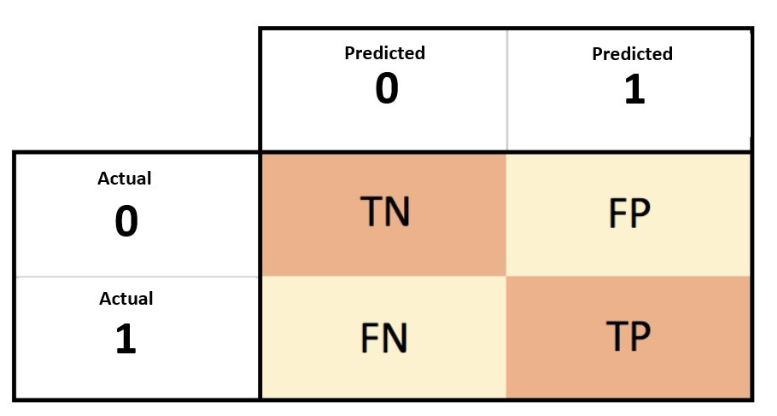

$$
Accuracy = \frac{TP + TN}{TP + FP + FN + TN}
$$
Accuracy is a valid choice of model precision evaluation for classification problems which are well-balanced and not skewed or No class imbalance

Accuracy is the proportion of true resylts among the total number of cases examined

Or it representing the ***overall correctness*** of the model's predictions

---
$$
Precision = \frac{TP}{TP + FP}
$$
Precision is a valid choice of evaluation metric when we want to be cery syre of our prediction

Precision, which answers the following question: What proportion of predicted Positive is truely Positive

measures the model's abiliy to ***correctly predict the posiive class***, it is useful when the cost of alse positives is high.

---

$$
Recall = \frac{TP}{TP + FN}
$$

Recall is a valid choice of evaluation metric when we want to capture as many postives as possible

Recall, which answers a different questions: what proportion of actual Positives is correctly classified

Recall quaiifies ***the model's ability to correctly identify*** the positive class instances.


---

$$
Specificity = \frac{TN}{TN + FP}
$$

 Specificity measures the model's ability to correctly identify the negative class instances.

 specificity is important when the cost of FN is high

---


***Key words***, negative here do not stands for the value, it stands for the true false or the boolean results of the output. The True and False one are the one which represents the wrongly putted points. Or data points that is misrepresented, like being True but given False, and vice versa.


**True Positive** $(TP)$: stands the amount the model predicted the positive class correctly.

**True Negative** $(NP)$: stands the amount the model predicted the negative class correctively

**False Positive** $(FP)$: meaning the model predicted the positive class incorrectly.

**False Negative** $(FN)$: meaning that the model predicted the negative class incorrectly.

From all that, we can evaluate the F1 score, which is a number between 0 and 1 and it is the harmonic mean of precision and recall

**The F1 score sort of maintains a balance between the precision and recall for the classifier. If the prcision is low, then the F1 is low and also the recall is low than the F1 score is low too**


$$
F1 = \frac{2}{\frac{1}{precision} + \frac{1}{Recall}}
$$

$$-> F1 = 2*\frac{Precision * Recall}{precision + Recall}$$





In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

from sklearn.metrics import classification_report

In [ ]:
x = iris_df.iloc[:,:2]
y = iris_df.is_setosa

y_predicted = sklearn_logistic_regression_model.predict(x)

print(classification_report( y, y_predicted))

              precision    recall  f1-score   support

       False       1.00      1.00      1.00       100
        True       1.00      1.00      1.00        50

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150



#2.Support Vector Machine (SVM)
in the Support Vector Machine(SVM), inclusing Support Vector Classification(SVC) and Support Vector Regression(SVR)


##SVM Introduction

So, why care to invent SVM in the first place anyway?

Basically, the border created may be a bit too bias, if the created border is a bit to close to the negative, the new positive points may be wrong, or if a point that is wrongly put, the border maybe wrongly dictate the next one.

The creation of the Support Vector Machine is to create a more reasonable border, or in fact 3 different borders to keep the integrity and the accuracy of the territories.

This was created mainly by the needs for the reasonable and equal distance (margin) of the cloest of the two territories.


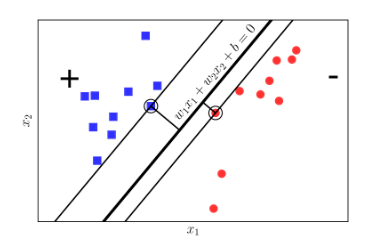

in a world of d-dimension, we have a random point $x_i = [x_1, x_2,...,x_d]$ and a d-1 dimension of hyperplane of $w_1x_1 + w_2x_2 + ... + w_dx_d + b = W^dX + b = 0$

$$D = \frac{|W^T{x_1} + b|}{\sqrt{\sum^n_{i=1}w_i^2}}$$

This solution show a problem is that the distances between each class point and the solution are equal but this distance is too small.
=> That's not good for classification

These are the reasons why SVM try to find a classification boundary which assure: The distances (or can be called margin) between the solution and nearest point of each class are equal and largest.

SVM is better than Neural network with only one layer - Logistic Regression.

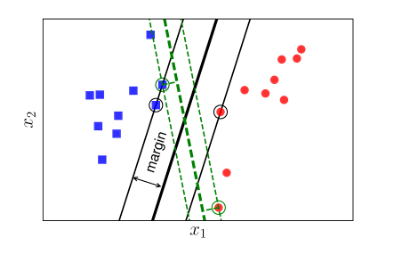

We assume that $ W^T X + b = w_1 x_1 + w_2 x_2 + b = 0 $ is the classification boundary. We have the distance between a data point $((x_i, y_i)\)$ and the classification boundary

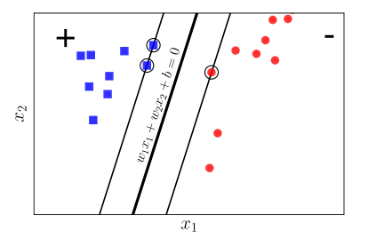

and margin is the minimum distance of all data points,

$$
D = \frac{y_i(W^T X_i + b)}{\sqrt{\sum_{i=1}^{d} w_i^2}} \tag{3}
$$

$$
\text{margin} = \min_i \frac{y_i(W^T X_i + b)}{\sqrt{\sum_{i=1}^{d} w_i^2}} \tag{4}
$$

We have to optimize the value of margin or, in other words, we have to find \(W\) and \(b\) to maximize the margin.

$$
(W, b) = \arg \max_{W, b} \left\{ \min_i \frac{y_i(W^T X_i + b)}{\sqrt{\sum_{i=1}^{d} w_i^2}} \right\} \tag{5}
$$

It's complex to optimize the above formula, so we consider the classification boundary

$$
W^T X + b = w_1 x_1 + w_2 x_2 + b = 0 \tag{6}
$$
$$
kW^T X + kb = kw_1 x_1 + kw_2 x_2 + kb = 0 \tag{7}
$$

If we multiply both sides by \(k > 0\), the classification boundary is not changed. So we get the numerator \( y_i(W^T X_i + b) \) from the margin formula and assume that

$$
{y_i(kW^T X_i + kb)} = v \tag{8}
$$
$$
y_i(kW^T X_i + kb) = 1 \tag{9}
$$


from all those maths, this basically means that we will pick the closest points to the border from the two sides, find a line that have the same distance between the two points, and but the negative side as

$$
{y_i(kW^T X_i + kb)} = -1 \tag{8}
$$

and the positive side as:

$$
y_i(kW^T X_i + kb) = 1 \tag{9}
$$
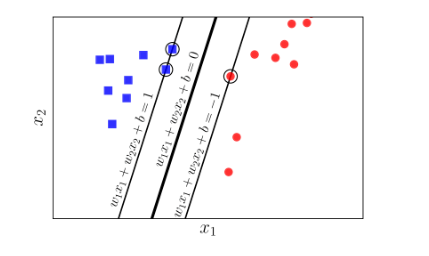

With that assumption, we have

$$
\forall i,\ y_i(kW^T X_i + kb) \geq 1 \tag{10}
$$

and we optimize

$$
(W, b) = \arg\max_{W, b} \left\{ \min_i \frac{y_i(W^T X_i + b)}{\sqrt{\sum_{i=1}^n w_i^2}} \right\} \tag{11}
$$

%%
= \arg\max_{W, b} \frac{1}{\sqrt{\sum_{i=1}^n w_i^2}} \tag{12}
$$

$$
\forall i,\ y_i(kW^T X_i + kb) \geq 1 \tag{13}
$$

We modify to get the more simple optimization formular

$$
(W, b) = \arg\min_{W, b} \sqrt{\sum_{i=1}^n w_i^2} \tag{14}
$$

$$
              \space= \arg\min_{W, b} \sum_{i=1}^n w_i^2 \tag{15}
$$

$$
\forall i,\ y_i(kW^T X_i + kb) \geq 1 \tag{16}
$$

To optimize this formular, we use Convex optimization algorithms.


##Soft-margin SVM

If there are other uniques circumstances, like the points got into the wrong territory,

 those points which is illogically or abnormally close to the main border or just in the wrong territory is called **noise**

 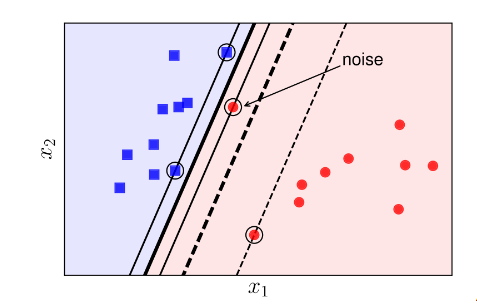



 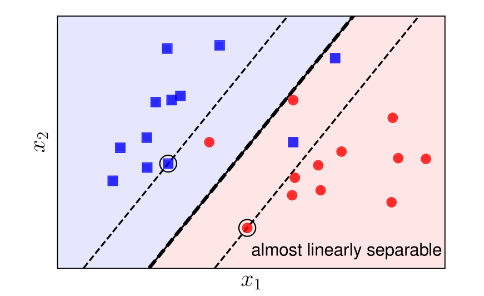

so basically these noises makes the creation of the "fair border" possible, which is why we got the notion soft-margin SVM, and that is why pure SVM or hard-margin SVM are really susceptible to noise.

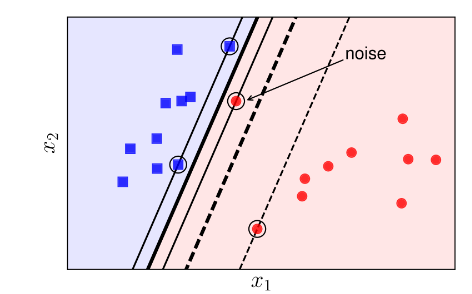


so we want things to be as fair as possible despite those noises, so in order to do that, we have to do it manually with numbers, but how, which equations to use

-> we now have the answer in the following

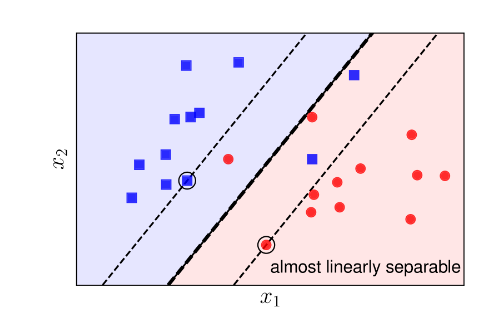



So the idea is:

- from the previous assumptions of create two other border of
$$
{y_i(kW^T X_i + kb)} = -1 \tag{8}
$$

and the positive side as:

$$
y_i(kW^T X_i + kb) = 1 \tag{9}
$$

lets take the negative territory for instance, we can check if there are noises or anomalies that a negative points is in the positive points, and then we can check for the distance between the negative function to that those points, if the distance is more than 1, then it is error, and vice versa.

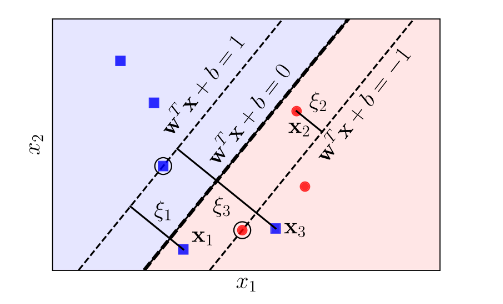



To maximize the margin, like Hard-margin SVM, we optimize  
$$
(W, b) = \arg\min_{W, b} \sum_{i=1}^{d} w_i^2
$$

To minimize the number of ignored data points, for each data point \( x_i \) in the dataset, we propose a variable called \( \xi \) to validate their position respected to the margin.

For each data point \( x_i \) in the dataset,

- if \( x_i \) is classified exactly and \( x_i \) is outside of the margin, \( \xi_i = 0 \)
- if \( x_i \) is classified exactly and \( x_i \) is inside of the margin, \( 0 < \xi_i < 1 \)
- if \( x_i \) is not classified, \( \xi_n > 1 \)

We have the following optimization problem for Hard-margin SVM,
$$
(W, b) = \arg\min_{W, b} \sum_{i=1}^{d} w_i^2 \tag{17}
$$
subject to:
$$
\forall n, \; y_i(kW^T X_i + kb) \geq 1 \tag{18}
$$

We have the following optimization problem for Soft-margin SVM with \( \xi \) in the optimization condition:
$$
(W, b) = \arg\min_{W, b} \sum_{i=1}^{d} w_i^2 + C \sum_{i=1}^{N} \xi_i \tag{19}
$$
subject to:
$$
\forall n, \; y_i(kW^T X_i + kb) \geq 1 - \xi_i \tag{20}
$$

The role of \( C \) here is to balance the terms in the function.

- With small \( C \), Soft-margin SVM will ignore lots of points to maximize the margin.
- With big \( C \), Soft-margin SVM will try to ignore zero point. In case of linearly separable dataset, Soft-margin SVM will optimize to become the optimal Hard-margin SVM.

***SO BASICALLY, USING THE C= TO FIND THE OPTIMAL POINTS AND MARGINS TO CREATE THE TWO PERIPHERAL LINE***

- if you are curious on how that works: so we want to find a point where the margin to be equal to 1, and the $ξ_i$ is the distance, so the $Cξ_i = 1$, meaning the lesser then $C$ the higher the  $ξ_i$ , the bigger the margin of the main border to the two peripheral ones. For instance:


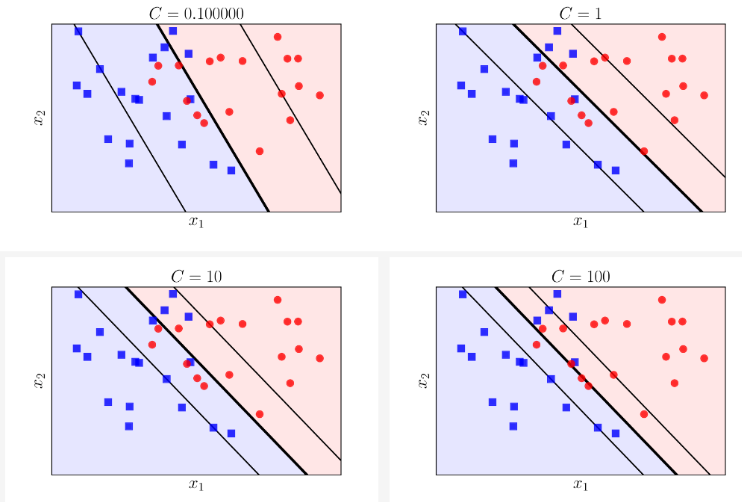

###Coding Examples:

####Simple Introductory Example

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
iris_df.species = iris_df.species.map(lambda x: True if x=='setosa' else False)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,True
1,4.9,3.0,1.4,0.2,True
2,4.7,3.2,1.3,0.2,True
3,4.6,3.1,1.5,0.2,True
4,5.0,3.6,1.4,0.2,True
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False
146,6.3,2.5,5.0,1.9,False
147,6.5,3.0,5.2,2.0,False
148,6.2,3.4,5.4,2.3,False


     petal_length  petal_width
0             1.4          0.2
1             1.4          0.2
2             1.3          0.2
3             1.5          0.2
4             1.4          0.2
..            ...          ...
145           5.2          2.3
146           5.0          1.9
147           5.2          2.0
148           5.4          2.3
149           5.1          1.8

[150 rows x 2 columns]


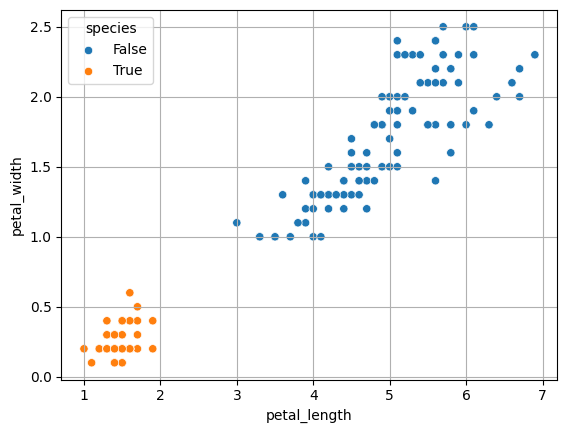

In [ ]:
x = iris_df.loc[:,['petal_length','petal_width']]
y = iris_df.species

sns.scatterplot(data=iris_df, x='petal_length', y='petal_width', hue='species')
plt.grid(True)
print(x)

In [ ]:
x = iris_df.loc[:,['petal_length','petal_width']]
y = iris_df.species

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=43)


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#this made to differenciate the two methods of Suppport Vector Machine and
#Common Logistic Regression.
from sklearn.metrics import classification_report

SVM_SVC_model = SVC(kernel = 'linear', C = 1e5, random_state=43)
SVM_SVC_model.fit(x_train, y_train)
y_prediction_SVM = SVM_SVC_model.predict(x_test)
y_efficiencytest_SVM = SVM_SVC_model.predict(x_train)

print(SVM_SVC_model.coef_)
print(SVM_SVC_model.intercept_)
print(classification_report(y_train, y_efficiencytest_SVM))
print(classification_report(y_test, y_prediction_SVM))

[[-1.09589056 -0.41095896]]
[3.24657578]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        76
        True       1.00      1.00      1.00        36

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        24
        True       1.00      1.00      1.00        14

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [ ]:
LogisticRegression_model = LogisticRegression()
LogisticRegression_model.fit(x_train, y_train)
y_prediction_LR = LogisticRegression_model.predict(x_test)
y_efficiencytest_LR = LogisticRegression_model.predict(x_train)

print(LogisticRegression_model.coef_)
print(LogisticRegression_model.intercept_)
print(classification_report(y_train, y_efficiencytest_LR))
print(classification_report(y_test, y_prediction_LR))

[[-2.39528821 -0.93636148]]
[7.43877436]
              precision    recall  f1-score   support

       False       1.00      1.00      1.00        76
        True       1.00      1.00      1.00        36

    accuracy                           1.00       112
   macro avg       1.00      1.00      1.00       112
weighted avg       1.00      1.00      1.00       112

              precision    recall  f1-score   support

       False       1.00      1.00      1.00        24
        True       1.00      1.00      1.00        14

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [ ]:
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,True
1,4.9,3.0,1.4,0.2,True
2,4.7,3.2,1.3,0.2,True
3,4.6,3.1,1.5,0.2,True
4,5.0,3.6,1.4,0.2,True
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,False
146,6.3,2.5,5.0,1.9,False
147,6.5,3.0,5.2,2.0,False
148,6.2,3.4,5.4,2.3,False


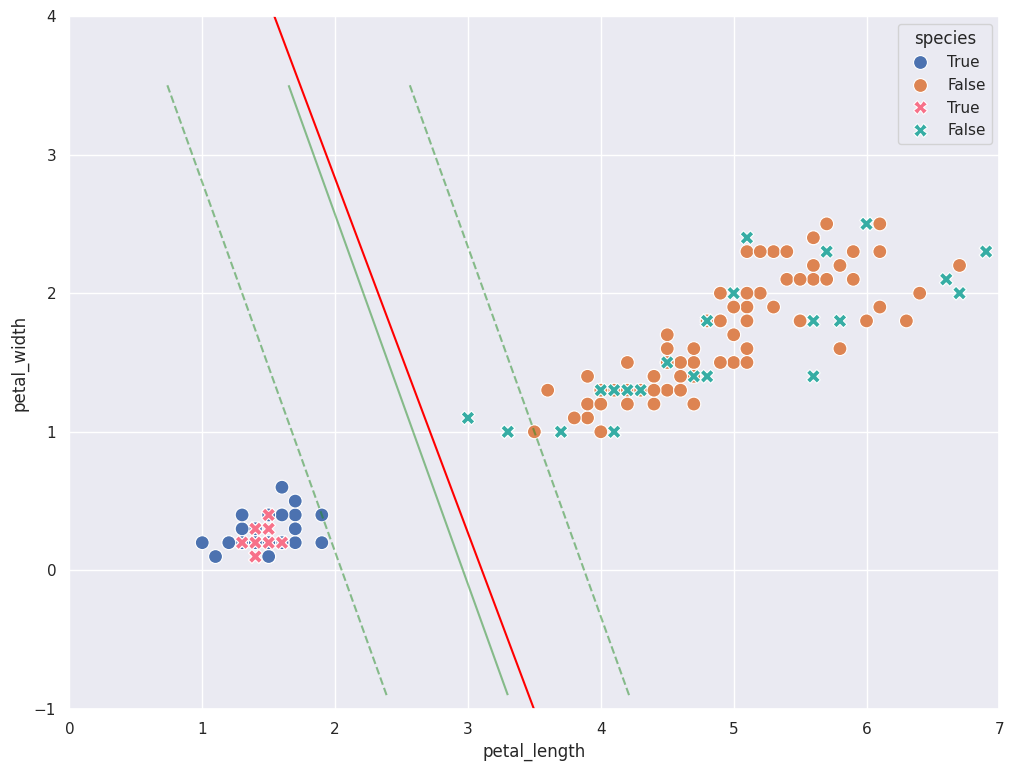

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay
#this is a library to create a SVM lines in a plt graph.

sns.set()

plt.figure(figsize=(12,9))

df_train = pd.concat([x_train,y_train],axis = 1)
sns.scatterplot(data=df_train,x ="petal_length", y ="petal_width" ,
                hue= "species",s = 100, hue_order= [True,False])

df_test = pd.concat([x_test,y_test], axis = 1)
sns.scatterplot(data=df_test,x ="petal_length", y ="petal_width" , marker = "X",
                hue= "species",s = 100, hue_order= [True,False],palette= "husl")

axis = plt.gca()

DecisionBoundaryDisplay.from_estimator(
    SVM_SVC_model,
    x_train,
    plot_method="contour",
    colors="forestgreen",
    levels = [-1,0,1],
    alpha = 0.5,
    linestyles=["--","-","--"],
    ax=axis
)

lr_w = LogisticRegression_model.coef_
lr_b = LogisticRegression_model.intercept_
reg_x = np.linspace(1,7,2)
reg_y =-lr_b/lr_w[0][1] + (-lr_w[0][0]/lr_w[0][1])*reg_x

plt.plot(reg_x, reg_y, c='red')
plt.xlim(0,7)
plt.ylim(-1,4)

plt.show()

####C alteration Example

,sepal_length,sepal_width,petal_length,petal_width,species
50,7.0,3.2,4.7,1.4,versicolor
51,6.4,3.2,4.5,1.5,versicolor
52,6.9,3.1,4.9,1.5,versicolor
53,5.5,2.3,4.0,1.3,versicolor
54,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


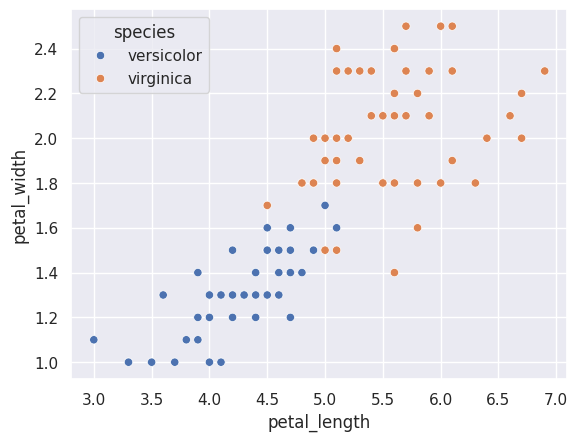

In [ ]:
iris_df = sns.load_dataset('iris')
iris_df = iris_df[iris_df.species != "setosa"]
sns.scatterplot(data= iris_df, x="petal_length", y="petal_width", hue = "species")
iris_df

In [ ]:
x = iris_df.loc[:,['petal_length','petal_width']]
y = iris_df.species.map(lambda x: True if x == "versicolor" else False)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=43)


from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
#this made to differenciate the two methods of Suppport Vector Machine and
#Common Logistic Regression.
from sklearn.metrics import classification_report

print("C=0.1")
SVM_SVC_model_C0_1 = SVC(kernel = 'linear', C = 0.1, random_state=42)
SVM_SVC_model_C0_1.fit(x_train, y_train)
y_prediction_SVM = SVM_SVC_model_C0_1.predict(x_test)
y_efficiencytest_SVM = SVM_SVC_model.predict(x_train)

print(SVM_SVC_model_C0_1.coef_)
print(SVM_SVC_model_C0_1.intercept_)
print(classification_report(y_train, y_efficiencytest_SVM))
print(classification_report(y_test, y_prediction_SVM))

print("----------------------------------------------------------------------")

print("C=1")
SVM_SVC_model_C10 = SVC(kernel = 'linear', C = 1, random_state=42)
SVM_SVC_model_C10.fit(x_train, y_train)
y_prediction_SVM = SVM_SVC_model_C10.predict(x_test)
y_efficiencytest_SVM = SVM_SVC_model_C10.predict(x_train)

print(SVM_SVC_model_C10.coef_)
print(SVM_SVC_model_C10.intercept_)
print(classification_report(y_train, y_efficiencytest_SVM))
print(classification_report(y_test, y_prediction_SVM))

print("----------------------------------------------------------------------")

print("C=1000")
SVM_SVC_model_C1000 = SVC(kernel = 'linear', C = 1000, random_state=42)
SVM_SVC_model_C1000.fit(x_train, y_train)
y_prediction_SVM = SVM_SVC_model_C1000.predict(x_test)
y_efficiencytest_SVM = SVM_SVC_model_C1000.predict(x_train)


print(SVM_SVC_model_C1000.coef_)
print(SVM_SVC_model_C1000.intercept_)
print(classification_report(y_train, y_efficiencytest_SVM))
print(classification_report(y_test, y_prediction_SVM))

print("----------------------------------------------------------------------")

print("Logistic Regression Model")
LogisticRegression_model = LogisticRegression()
LogisticRegression_model.fit(x_train, y_train)
y_prediction_LR = LogisticRegression_model.predict(x_test)
y_efficiencytest_LR = LogisticRegression_model.predict(x_train)

print(LogisticRegression_model.coef_)
print(LogisticRegression_model.intercept_)
print(classification_report(y_train, y_efficiencytest_LR))
print(classification_report(y_test, y_prediction_LR))

C=0.1
[[-1.01 -0.82]]
[6.23249979]
              precision    recall  f1-score   support

       False       0.52      1.00      0.68        39
        True       0.00      0.00      0.00        36

    accuracy                           0.52        75
   macro avg       0.26      0.50      0.34        75
weighted avg       0.27      0.52      0.36        75

              precision    recall  f1-score   support

       False       0.92      1.00      0.96        11
        True       1.00      0.93      0.96        14

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25

----------------------------------------------------------------------
C=1
[[-2.00983411 -2.1081969 ]]
[13.20654551]
              precision    recall  f1-score   support

       False       0.95      0.97      0.96        39
        True       0.97      0.94      0.96        36

    accuracy                  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


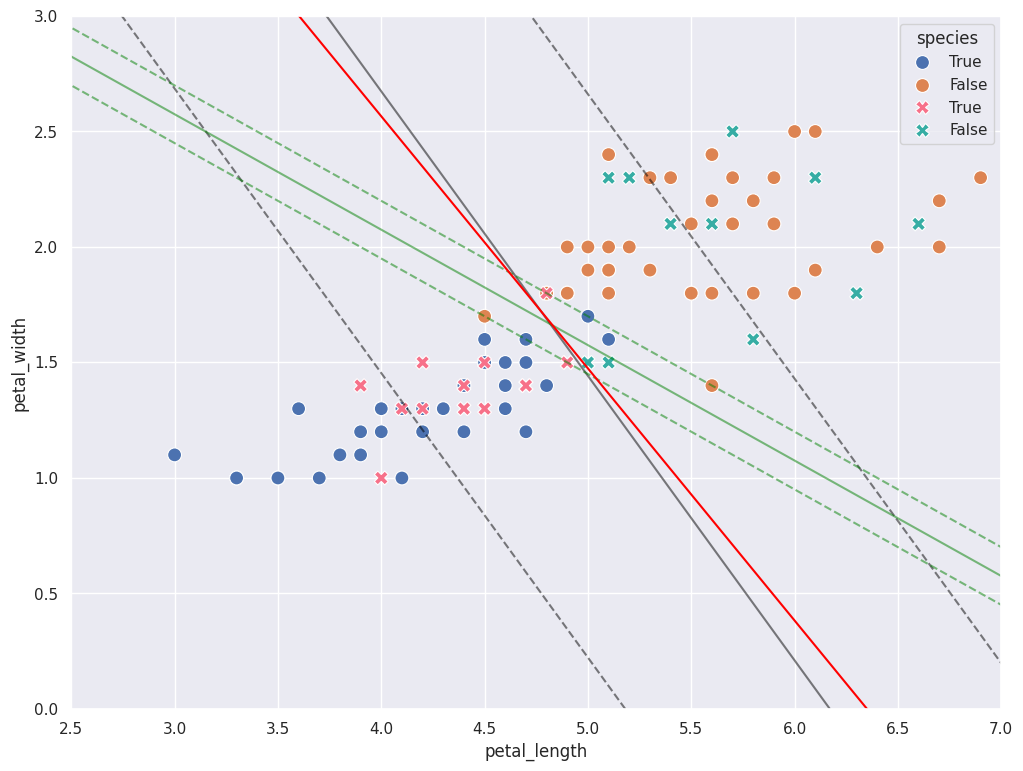

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import DecisionBoundaryDisplay
#this is a library to create a SVM lines in a plt graph.

sns.set()

plt.figure(figsize=(12,9))

df_train = pd.concat([x_train,y_train],axis = 1)
sns.scatterplot(data=df_train,x ="petal_length", y ="petal_width" ,
                hue= "species",s = 100, hue_order= [True,False])

df_test = pd.concat([x_test,y_test], axis = 1)
sns.scatterplot(data=df_test,x ="petal_length", y ="petal_width" , marker = "X",\
                hue= "species",s = 100, hue_order= [True,False],palette= "husl")

axis = plt.gca()
DecisionBoundaryDisplay.from_estimator(
    SVM_SVC_model_C0_1,
    x_train,
    plot_method="contour",
    colors="black",
    levels = [-1,0,1],
    alpha = 0.5,
    linestyles=["--","-","--"],
    ax=axis
)



DecisionBoundaryDisplay.from_estimator(
    SVM_SVC_model_C1000,
    x_train,
    plot_method="contour",
    colors="green",
    levels = [-1,0,1],
    alpha = 0.5,
    linestyles=["--","-","--"],
    ax=axis
)


lr_w = LogisticRegression_model.coef_
lr_b = LogisticRegression_model.intercept_
reg_x = np.linspace(1,7,2)
reg_y =-lr_b/lr_w[0][1] + (-lr_w[0][0]/lr_w[0][1])*reg_x

plt.plot(reg_x, reg_y, c='red')
plt.xlim(2.5,7)
plt.ylim(-0,3)

plt.show()

##Kernel Support Vector Machine

From the previous coding examples, you notice, from every SVM examples, there is a certain parameters, and which it can be taken as

```
from sklearn.svm import SVC

SVM_SVC_model_C1 = SVC(kernel = 'linear', C = 1, random_state=42)
```

We see the `kernel = 'linear'`, and why it is whould have 'linear', and the given example there mention where it can be changed to various types, and what types it is? Kernel Support Vector Machine would probably answer that question, wouldn't it?

The original SVM (Hard-margin SVM) works with linearly separable dataset

The Soft-margin SVM works with linearly separable dataset with noise or almost linearly separable dataset.

And, how about non-linearly separable dataset?

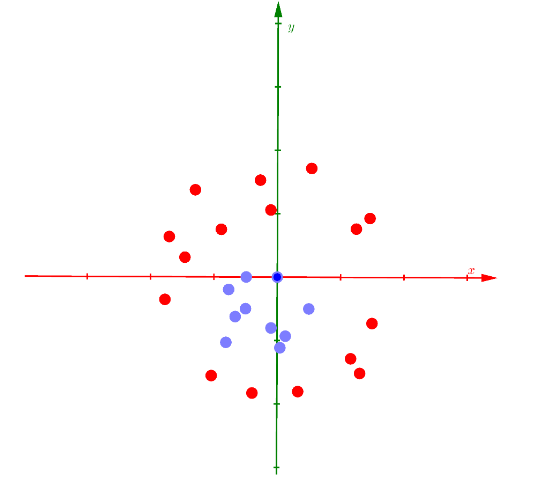

---

Kernel SVM in this case will propose a function
$Φ$
 to map each data point
$x_i$
 in the dataset to the new data space. And in this space, our non-linearly separable dataset can become linearly separable dataset or almost linearly separable dataset

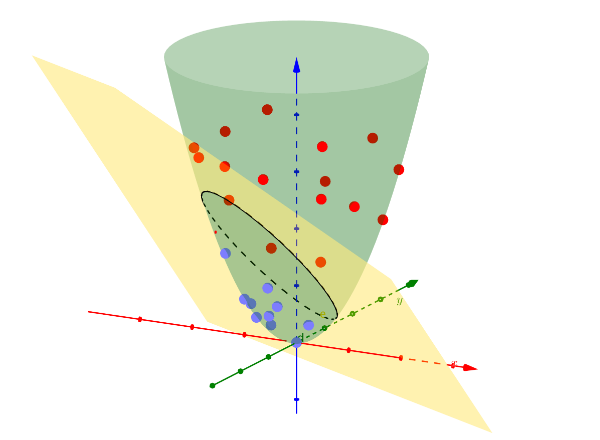
 ---
In the new data space, we can use Soft-margin SVM or Hard-margin SVM to find the classification boundary. With this classification boundary in the new data space, we can find the classification boundary in the original data space.

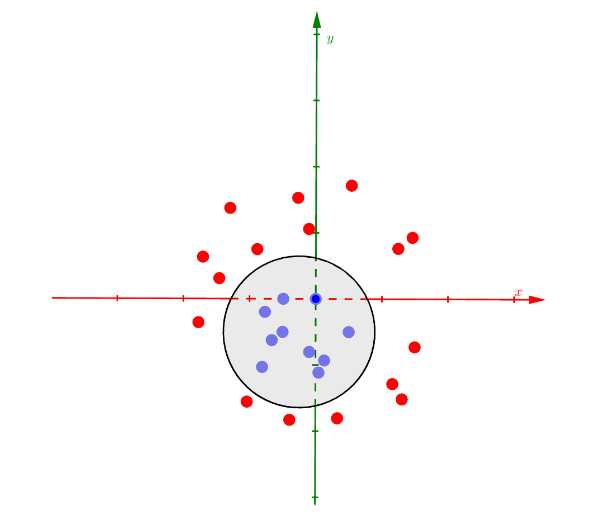

To save the computation cost, the function
$Φ$
 can be kernel function. That's why we call Kernel SVM. Instead of directly map data point
$x_i$
 in the dataset to the new data space, kernel function try to calculate the relationship between data point in the new data space.

So basically, the whole concept of this Kernel Support Vector Machine of dicatating the internal border of a graph is to convert the previous graph of a d-dimentsion to change it into d+1 dimensional model.

In that example, we can have the whole outside points of the higher in the z-line, and the inside points shorter in the z-line, and then there will be a border created by the previous discipline of the **Support Vector Machine**, which will creates a intersections between the parabol created from the previous idea, which that line/circle/elipse of intersection will return back to the Oxy space (2D space) and acted like the border for the lower z-line.


So basically, the thing to remember here is to making the internal group of points to be lower in the new dimension line, while the outside to be higher

Mathematically speaking, there are certain fuctions used to describe this discoveries.

https://machinelearningcoban.com/2017/04/22/kernelsmv/

it is honestly too hard for me, can anyone help me with this?

but basically, there are certain mode to change in the kernel = thing here:

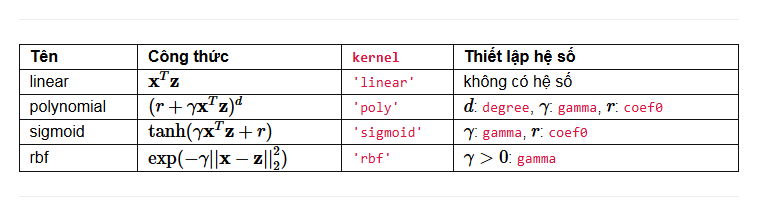

which can be used based on certain circumstances.


and rbf is Radial Basic Function

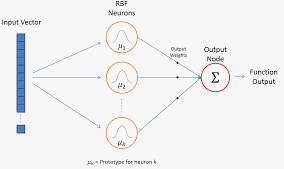

## Support Vector Regression

Basically, Support Vector Regression based on the the Support Vector Machine  Support Vector Regression of having 2 peripheral vector with

$$
{y_i(kW^T X_i + kb)} = -1 \tag{8}
$$

and the positive side as:

$$
y_i(kW^T X_i + kb) = 1 \tag{9}
$$

which these two functions is called as :***Decision Boundary***

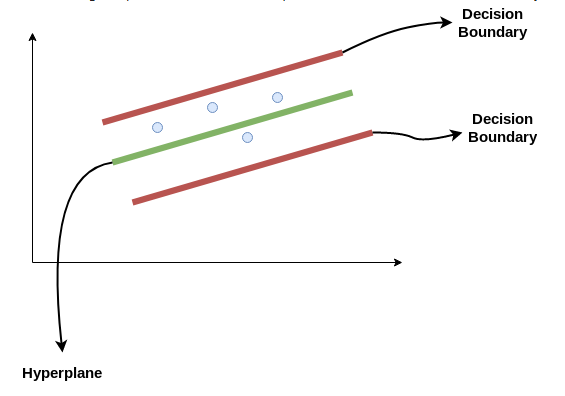

Consider these two red lines as the decision boundary and the green line as the hyperplane. Our objective, when we are moving on with SVR, is to basically consider the points that are within the decision boundary line. Our best fit line is the hyperplane that has a maximum number of points.

The first thing that we’ll understand is what is the decision boundary (the danger red line above!). Consider these lines as being at any distance, say ‘
a
’, from the hyperplane. So, these are the lines that we draw at distance ‘
+
a
’ and ‘
−
a
’ from the hyperplane. This ‘
a
’ in the text is basically referred to as epsilon.

Assuming that the equation of the hyperplane is as follows:

Y
=
w
x
+
b
 (equation of hyperplane) Then the equations of decision boundary become:

w
x
+
b
=
+
a

w
x
+
b
=
−
a

Thus, any hyperplane that satisfies our SVR should satisfy:

−
a
<
Y
−
w
x
+
b
<
+
a

Our main aim here is to decide a decision boundary at ‘a’ distance from the original hyperplane such that data points closest to the hyperplane or the support vectors are within that boundary line.

this means the regressing line/function will be dictated by the the route created by the given data.

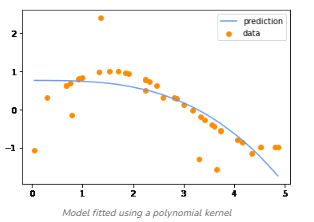

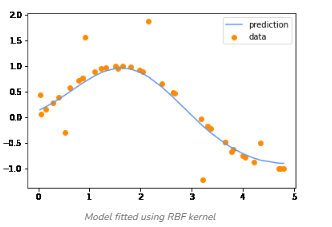

###Coding Examples

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
iris_df = sns.load_dataset('iris')
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
from sklearn.preprocessing import LabelEncoder
label_encoder_model = LabelEncoder()
iris_df.species = label_encoder_model.fit_transform(iris_df.species)
iris_df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
x = iris_df.loc[:,~iris_df.columns.isin(['species'])]
y = iris_df.species

from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

SVR_regressor = SVR(kernel = 'linear', C=10)
LinearRegression_regressor = LinearRegression()

SVR_regressor.fit(x_train, y_train)
LinearRegression_regressor.fit(x_train, y_train)

y_SVR_prediction = SVR_regressor.predict(x_test)
y_LinearRegression_prediction = LinearRegression_regressor.predict(x_test)

#------------------------------------------------------------------------------------

from sklearn.metrics import mean_squared_error, r2_score, median_absolute_error



print("R2_score compilation, Support Vector Regression:", r2_score(y_test, y_SVR_prediction),
       "\n Linear Regression: ", r2_score(y_test, y_LinearRegression_prediction))
print("Mean Squared Error compilation, Support Vector Regression:", mean_squared_error(y_test, y_SVR_prediction),
       "\n Linear Regression: ", mean_squared_error(y_test, y_LinearRegression_prediction))
print("Median Absoulute Error compilation, Support Vector Regression:", median_absolute_error(y_test, y_SVR_prediction),
       "\n Linear Regression: ", median_absolute_error(y_test, y_LinearRegression_prediction))

R2_score compilation, Support Vector Regression: 0.9512035919329654 
 Linear Regression:  0.9468960016420045
Mean Squared Error compilation, Support Vector Regression: 0.03410326741573862 
 Linear Regression:  0.03711379440797686
Median Absoulute Error compilation, Support Vector Regression: 0.09910149971818782 
 Linear Regression:  0.08821692257312666


# 3.Naive_bayes Classification

## a, Naive Bayes Classification.

###Theory

So what are Naive Bayes even means

Why it is Naive though, it makes no sense: Native Bayes is called "native" because it makes a simplifying assumptions that features used to **make predictions are conditionally independence, meaning that they don't influence each others** and the Bayes is the name come fromt the Bayes' Theorem, a formula used in probability theory that describe the probability of an event based on prior knowledge of conditions that might be relevant to the event

the fuction is describe as:

$$
P(A|B) = \frac{P(B|A)P(A)}{P(B)}
$$

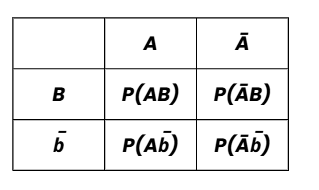


from this, we let $P(AB) = a$, $P(ÂB) = b$, $P(AB̂)=c$, $P(ÂB̂)=d$

and we also interpret those symbols as:

$P(B|A) = \frac{a}{a+c}$ and $P(A|B) = \frac{a}{a+b}$
so basically the foundation of this is:
$$\frac{a}{a+b} = \frac{\frac{a}{a+c}(a+c)}{(a+b)}$$

with $P(B|A)$ means the probability of B if we already know A

so do with the card example, lets say what is the probability of finding a J if already know that we will full the heart.

$$
p(J \mid \text{Heart}) = \frac{p(\text{Heart} \mid J) p(J)}{p(\text{Heart})} \\
= \frac{\frac{1}{4} \cdot \frac{4}{52}}{\frac{1}{4}}
$$


so this simple functions basically takes the probability from the already knows stuff, and guess the probability for the hyphothesis *to* be true.

Like, for instance:
ou love candy, and you’re trying to guess what flavor a candy is just by looking at its wrapper color.

Here’s what you know from your past experience:

If the wrapper is red, it's usually strawberry.

If the wrapper is yellow, it's often banana.

Sometimes, other flavors sneak in, but you have a good idea from what you've seen before.

When you get a new candy with a red wrapper, you think:

**“Hmm… most red ones were strawberry before, so this is probably strawberry!”**

or when

Your computer sees:

Words like “FREE” or “MONEY” → probably spam

Words like “meeting” or “report” → probably not spam

So it uses Naive Bayes to guess if your email is spam or not.

That’s what Naive Bayes does!

---

Naive Bayes is a guessing tool that:

- Looks at what you already know (like how often each flavor shows up with each wrapper color),

- Uses that to make a smart guess about what you’re seeing now.



**Key words: CLASS**
a naive bayes calculates the probability the event is in which category, and which in simple circumstances it could be 2 different classes like "spam" or "not spam", but in a circumstances where we have the classification problem with C classes. Indicated by 1,2,3,...,C.

at class c, we have:

We have the classification problem with C classes 1, 2, 3, ..., C, class c.

We want to find:

$$
p(y = c \mid x) \quad \text{or} \quad p(c \mid x) \tag{4}
$$

and we can choose the class for sample x by:

$$
c = \arg\max_{c \in \{1, \ldots, C\}} p(c \mid z) \tag{5}
$$

Using Bayes’ formula, and because $ p(z) $ does not depend on class $ c $, we have:

$$
c = \arg\max_{c \in \{1, \ldots, C\}} p(c \mid x) \tag{6}
$$

$$
= \arg\max_{c \in \{1, \ldots, C\}} \frac{p(x \mid c)p(c)}{p(x)} \tag{7}
$$

<h1>Simplified

So we want to know the chance of recognizing this this is a **car** to **what i see**

$$
p(class = car | what\:I\:see)
$$

We look at all the possible classes (car, ball, doll, etc.), and pick the one with the biggest chance:

$$c = the(class\:that\: has\: the\: biggest\: p(car | what\:i\:see)$$

with bayes:

$$c = the(class\:that\: has\: the\: biggest\: \frac{p( what\:i\:see|car)p( car)}{p(what\:i\:see)}$$

But we don’t know p(c | z) directly!
So we use a magic formula called Bayes’ Rule to flip it around and use things we can figure out.

Since $ p(what\:i\:see)$ is the same for everyone, we just compare between other classes this argument:

$$
= \arg\max_{c \in \{1, \ldots, C\}} p(x \mid c)p(c) \tag{8}
$$

---

Analyze each element in $ \arg\max_{c \in \{1, \ldots, C\}} p(z \mid c)p(c) $:

1. **$ p(c) $** is the probability of a random data sample belonging to class $ c $:

- We can calculate this value by Maximum Likelihood Estimation or Maximum a Posteriori estimation. => ***which is for the next episode***
- MLE is more popular.
- MLE calculates $ p(c) $ from the training data by the ratio of number of data samples in class $ c $ to the total number in the dataset.

2. **$ p(z \mid c) $** is the distribution of data sample $ z $ in class $ c $:

- It’s hard to calculate $ p(z \mid c) $ because $ z $ is a multi-dimensional data point.
- To simplify, we assume each element in $ x $ is independent. That’s why we call it **Naive Bayes**.
- Specifically, with $ x = [x_1, x_2, \ldots, x_d] $, we have:

$$
p(z \mid c) = p(x_1, x_2, \ldots, x_d \mid c) = \prod_{i=1}^{d} p(x_i \mid c) \tag{9}
$$

---

In the **training phase**, we calculate $ p(c)$ and each $ p(x_i \mid c) $ from the training data.

In the **prediction phase**, with calculated $ p(c)$ and each $ p(x_i \mid c) $, we compute:

$$
\arg\max_{c \in \{1, \ldots, C\}} p(z \mid c)p(c)
$$

But the product \$\prod_{i=1}^{d} p(x_i \mid c) $ can be **very small**, causing numeric issues. So we use **logarithms**:

$$
c = \arg\max_{c \in \{1, \ldots, C\}} p(c \mid x) \tag{10}
$$

$$
c = \arg\max_{c \in \{1, \ldots, C\}} p(x \mid c)p(c) \tag{10}
$$**just an reiteration from latter explaination


$$
= \arg\max_{c \in \{1, \ldots, C\}} p(c) \prod_{i=1}^{d} p(x_i \mid c) \tag{11}
$$

$$
= \arg\max_{c \in \{1, \ldots, C\}} \log(p(c)) + \sum_{i=1}^{d} \log(p(x_i \mid c)) \tag{13}
$$


###Coding/Gaussian Naive Bayes

In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB #*********************
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd

# Tạo dữ liệu
X, y = make_blobs(1000, 2, centers=2, random_state=2, cluster_std=1.5)

In [ ]:
print(X[:5],y[:5])
print("\n",pd.concat([pd.DataFrame(X[:5]),pd.DataFrame(y[:5])], axis = 1))

[[  1.36096253  -3.62447467]
 [ -1.24821068  -8.11509909]
 [ -0.65894634 -11.01595769]
 [  0.40085031  -0.94999984]
 [  2.68802217  -1.47019   ]] [1 0 0 1 1]

           0          1  0
0  1.360963  -3.624475  1
1 -1.248211  -8.115099  0
2 -0.658946 -11.015958  0
3  0.400850  -0.950000  1
4  2.688022  -1.470190  1


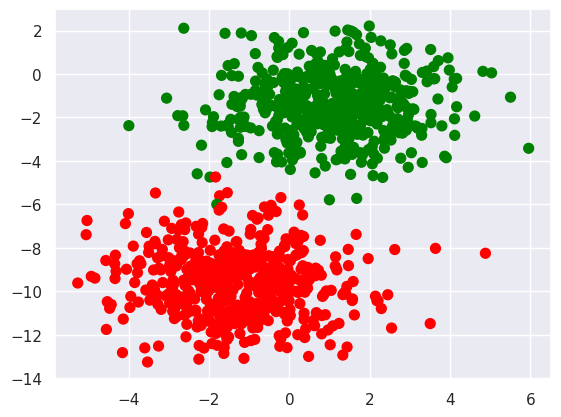

In [ ]:
plt.scatter(X[:, 0], X[:, 1],c=y, s=50, cmap = ListedColormap(["red", "pink", "green"]))

In [ ]:
NaiveBayes_Gaussian_model = GaussianNB()
NaiveBayes_Gaussian_model.fit(X,y)
predictedY = NaiveBayes_Gaussian_model.predict(X)
sum(y + predictedY)/len(y) #accuracy

np.float64(0.999)

In [ ]:
import numpy as np
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)
print(Xnew, ynew)
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap = ListedColormap(["brown","lightblue"]), alpha=0.8)

NameError: name 'model' is not defined

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap = ListedColormap(["brown","lightblue"]), alpha=0.1)
plt.axis(lim);

A nice piece of this Bayesian formalism is that it naturally allows for probabilistic classification, which we can compute using the predict_proba method:

The predict_proba() function is designed to give the probability estimates for each class label in a classification task

in specific, predict_proba() is used to predict the class probabilities. [0.6, 0.2, 0.2] is the output of predict_proba that simply denotes that the class probability for classes 0, 1 and 2 are 0.6, 0.2 and 0.2 respectively. Probabilities can be used when evaluation metric is AUC, ROC_AUC, MSE, MAE, RMSE.

In [ ]:
print(NaiveBayes_Gaussian_model.predict_proba(Xnew))
print(NaiveBayes_Gaussian_model.predict_proba(Xnew).round(3))

## b, Multinomial Naive Bayes

In Multinomial Naive Bates, where the features are asumed to be generated from a single multinomial distribution ( a common distribution for characterizing categorical variables)

Multinomial Naive Bayes is an extension of the Naive Bayes algorithm designed for handling discrete data

***<h3> Multinomial Naive Bayes is designed for discrete data, like word counts in text, while Gaussian Naive Bayes is suited for continuous data, like height or weight**


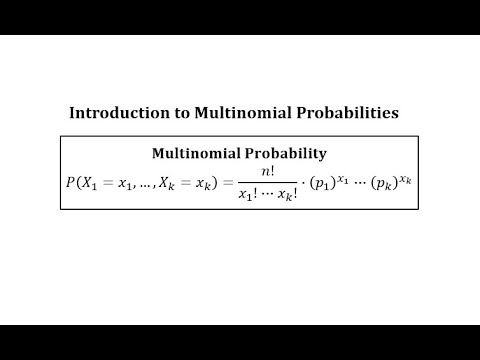

Which this functions intended to do is to count the amount of appearance or chances an event/object could occur, thus using that to describes the probability of observing counts amoung a number of categories with:
$$
p(x_i|c) = \frac{N_{ci}}{N_c} = λ_{ci}
$$

with

- $N_{ci}$ is total number of the $i^{th}$ word appear in the text of class c.
- $N_c$ is total number of words in the text of class c

Thus, the multinomial naive Bayes is the most appropriate for features that represents counts or count rates

One problem is that if one word doesn't appear in the text of class $c$ in the training dataset, this makes the results wrong.

To solve this problem, we modify $λ_{ci}$ by the following formular:
$$
\frac{N_{ci}+α}{N_c+ dα} = ̂λ_{ci}
$$

with $α$ often to = 1

###Example

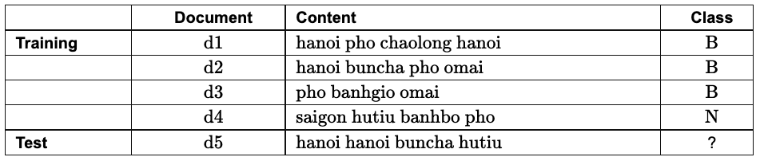


<h1> Naive Bayes Classification Example

---

**Step 1**: We have vocabulary  
$V={\text{hanoi, pho, chaolong, buncha, onai, banhgio, saigon, hutiu, banhbo}} $ and $ d = |V| = 9 $

---

**Step 2**: We calculate $ p(c) $. Specifically,  
$ p(B) = \frac{3}{4}, \quad p(N) = \frac{1}{4} $

---

**Step 3**: We calculate $ p(x_i|c) $ with $ \alpha = 1 $

<h1> On class \( c = B \)

\[
\begin{aligned}
p(\text{‘hanoi’}|B) &= \frac{3}{11}, & \hat{\lambda}_{B-\text{hanoi}} &= \frac{4}{20} \\
p(\text{‘pho’}|B) &= \frac{3}{11}, & \hat{\lambda}_{B-\text{pho}} &= \frac{4}{20} \\
p(\text{‘chaolong’}|B) &= \frac{1}{11}, & \hat{\lambda}_{B-\text{chaolong}} &= \frac{2}{20} \\
p(\text{‘buncha’}|B) &= \frac{1}{11}, & \hat{\lambda}_{B-\text{buncha}} &= \frac{2}{20} \\
p(\text{‘saigon’}|B) &= \frac{1}{11}, & \hat{\lambda}_{B-\text{saigon}} &= \frac{1}{20} \\
p(\text{‘hutiu’}|B) &= \frac{0}{11}, & \hat{\lambda}_{B-\text{hutiu}} &= \frac{1}{20} \\
p(\text{‘banhbo’}|B) &= \frac{0}{11}, & \hat{\lambda}_{B-\text{banhbo}} &= \frac{1}{20} \\
\end{aligned}
\]

---

<h1> On class \( c = N \)

\[
\begin{aligned}
p(\text{‘hanoi’}|N) &= \frac{0}{4}, & \hat{\lambda}_{N-\text{hanoi}} &= \frac{1}{13} \\
p(\text{‘pho’}|N) &= \frac{1}{4}, & \hat{\lambda}_{N-\text{pho}} &= \frac{2}{13} \\
p(\text{‘chaolong’}|N) &= \frac{0}{4}, & \hat{\lambda}_{N-\text{chaolong}} &= \frac{1}{13} \\
p(\text{‘buncha’}|N) &= \frac{0}{4}, & \hat{\lambda}_{N-\text{buncha}} &= \frac{1}{13} \\
p(\text{‘onai’}|N) &= \frac{1}{4}, & \hat{\lambda}_{N-\text{onai}} &= \frac{2}{13} \\
p(\text{‘banhgio’}|N) &= \frac{2}{4}, & \hat{\lambda}_{N-\text{banhgio}} &= \frac{3}{13} \\
p(\text{‘saigon’}|N) &= \frac{1}{4}, & \hat{\lambda}_{N-\text{saigon}} &= \frac{2}{13} \\
p(\text{‘hutiu’}|N) &= \frac{1}{4}, & \hat{\lambda}_{N-\text{hutiu}} &= \frac{2}{13} \\
p(\text{‘banhbo’}|N) &= \frac{1}{4}, & \hat{\lambda}_{N-\text{banhbo}} &= \frac{2}{13} \\
\end{aligned}
\]

---

**Step 4**: We calculate the prediction with \( d_5 = \text{``hanoi hanoi buncha hutiu''} \)

\[
\begin{aligned}
p(B|d_5) &= \log(p(B)) + \sum_{i=1}^{d} \log(p(x_i|B)) \\
&= \log(p(B)) + \log(\hat{\lambda}_{B-\text{hanoi}}) + \log(\hat{\lambda}_{B-\text{hanoi}}) + \log(\hat{\lambda}_{B-\text{buncha}}) + \log(\hat{\lambda}_{B-\text{hutiu}}) \\
&= \log\left(\frac{3}{4}\right) + \log\left(\frac{4}{20}\right) + \log\left(\frac{4}{20}\right) + \log\left(\frac{2}{20}\right) + \log\left(\frac{1}{20}\right)
\end{aligned}
\]


In [ ]:
import numpy as np

result = np.log(3/4) + np.log(4/20) + np.log(4/20) + np.log(2/20) + np.log(1/20)
print(round(result,2))

-8.8



\begin{aligned}
p(N|d_5) &= \log(p(N)) + \sum_{i=1}^{d} \log(p(x_i|N)) \\
&= \log(p(N)) + \log(\hat{\lambda}_{N-\text{hanoi}}) + \log(\hat{\lambda}_{N-\text{hanoi}}) + \log(\hat{\lambda}_{N-\text{buncha}}) + \log(\hat{\lambda}_{N-\text{hutiu}}) \\
&= \log\left(\frac{1}{4}\right) + \log\left(\frac{1}{13}\right) + \log\left(\frac{1}{13}\right) + \log\left(\frac{1}{13}\right) + \log\left(\frac{2}{13}\right)
\end{aligned}



In [ ]:
result = np.log(1/4) + np.log(1/13) + np.log(1/13) + np.log(1/13) + np.log(2/13)
print(round(result,2))

-10.95


###Coding Multinomial Naive Bayes with Sklearn

####Introducing to sklearn.datasets

i can have more information with this
https://scikit-learn.org/stable/datasets/loading_other_datasets.html

In [ ]:
#introduction to sklearn.datasets

from sklearn.datasets import fetch_20newsgroups
print(fetch_20newsgroups(subset = "train").data[0])
#In fetch_20newsgroups, the subset parameter controls which portion of the
#dataset you want to load.

From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.wam.umd.edu
Organization: University of Maryland, College Park
Lines: 15

 I was wondering if anyone out there could enlighten me on this car I saw
the other day. It was a 2-door sports car, looked to be from the late 60s/
early 70s. It was called a Bricklin. The doors were really small. In addition,
the front bumper was separate from the rest of the body. This is 
all I know. If anyone can tellme a model name, engine specs, years
of production, where this car is made, history, or whatever info you
have on this funky looking car, please e-mail.

Thanks,
- IL
   ---- brought to you by your neighborhood Lerxst ----







In [ ]:
from sklearn.datasets import fetch_20newsgroups

'''
for this, you could go on the internet and download the fetch_20newsgroups
file

when you do that, inside the file there will have all, train, test which can be addressed
by the subset= parameters, which can showed at the upper part error with the all means that
addressing all data, the test means the test files, and the train means the train files.

and inside the files, there are more files, which the categories will do the job, addressed
with the files name, and written in an iternation.

and with the .data[0], since inside those files, there are more files inside, which
this would specify which files to address, and since the each category compliments each others
'''


print(fetch_20newsgroups(subset = 'all', categories = ['talk.politics.guns']).data[0])

From: pat@rwing.UUCP (Pat Myrto)
Subject: Re: FBI Director's Statement on Waco Standoff
Distribution: misc.legal,tx.general,tx.politics.talk.politics.guns,alt.law-enforcement
Organization: Totally Unorganized
Lines: 36


In article <C5w0C9.2D0@intellection.com> emcguire@intellection.com (Ed McGuire) writes:
>In <1993Apr21.182458.12735@aio.jsc.nasa.gov> news&aio.jsc.nasa.gov (USENET) News (brenda kenworthy) writes:
>
>>And another thing that puzzles
>>me--why are they finding dead bodies inside who had bullet holes already in 
>>them???  Don't you think it's possible that Koresh shot the TRAITORS rather 
>>than letting them out???
>
>Possible.  I wouldn't put it past him.  It is also possible that they
>were hit by rounds exploding in the extreme heat.  Remember that kept
>the cops away for hours.  I have only heard that bodies were found
>shot, not any coroner's cause of death.

So far, the medical examiner (according to the news) has found NO EVIDENCE
of gunshot wounds in bodies so fa

In [ ]:
print(fetch_20newsgroups(subset = 'all').data[0])
print(fetch_20newsgroups(subset = 'train').data[0])
print(fetch_20newsgroups(subset = 'test').data[0])

From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


From: lerxst@wam.umd.edu (where's my thing)
Subject: WHAT car is this!?
Nntp-Posting-Host: rac3.w

####Using this data for Machine Learning.

so to do this, we can use TF-IDF

TF-IDF (Term Frequency-Inverse Document Frequency) is a numerical statistic used to evaluate the importance of a word in a document collection or corpus

In order to use this data for machine learning, we need to be able to convert the content of each string into a vector of numbers. We will use the TF–IDF vectorizer(Term Frequency Inverse Document Frequency)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

categories = ['talk.religion.misc', 'soc.religion.christian', 'talk.religion.misc','talk.politics.guns', 'sci.space','comp.graphics' ]
train_text_data = fetch_20newsgroups(subset = 'train', categories = categories)

TFIDF_transformer = TfidfVectorizer()
Transformed_data = TFIDF_transformer.fit_transform(train_text_data.data)
print(Transformed_data)
Transformed_data.toarray()[60:90]


'''
Discussion on TfidVectorizer:

So basically, this library alters those whole paragraphs into a frequency accounting
form, or like a form that report the frequencies of certain words in a paragraphs

and then using this to insert into the Naive Bayes calculation for find the correlation
between these frequencies and the categories/the example datasets that we have.

Under the output, we can see the co-ordiantes and the values, the co-ord means the
coordinate of a word in a datasets, and the value mentions the frequency of that word in
that dataset
'''

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 461870 stored elements and shape (2699, 43270)>
  Coords	Values
  (0, 18249)	0.012907934948658847
  (0, 34225)	0.2014256080974933
  (0, 30472)	0.10594652128815776
  (0, 34427)	0.30213841214623993
  (0, 35669)	0.14998929018635968
  (0, 31854)	0.17306397618564293
  (0, 34243)	0.30213841214623993
  (0, 36404)	0.2014256080974933
  (0, 37398)	0.012907934948658847
  (0, 32657)	0.01671086638318746
  (0, 31010)	0.06664802371229156
  (0, 42400)	0.06770174777555639
  (0, 8406)	0.1477430157984089
  (0, 36924)	0.2875269638068107
  (0, 21543)	0.07224900941756728
  (0, 33346)	0.034936638170671046
  (0, 39006)	0.027968438665517254
  (0, 13310)	0.18678309578404836
  (0, 41302)	0.30213841214623993
  (0, 11569)	0.07157266647043209
  (0, 26269)	0.04744002188221147
  (0, 28759)	0.08424904208289485
  (0, 26936)	0.081785420551954
  (0, 570)	0.04637484587654998
  (0, 7196)	0.040000253450886536
  :	:
  (2698, 37164)	0.09647960191748653
  (2698, 176

'\nDiscussion on TfidVectorizer:\n\nSo basically, this library alters those whole paragraphs into a frequency accounting\nform, or like a form that report the frequencies of certain words in a paragraphs\n\nand then using this to insert into the Naive Bayes calculation for find the correlation\nbetween these frequencies and the categories/the example datasets that we have.\n\nUnder the output, we can see the co-ordiantes and the values, the co-ord means the \ncoordinate of a word in a datasets, and the value mentions the frequency of that word in\nthat dataset\n'

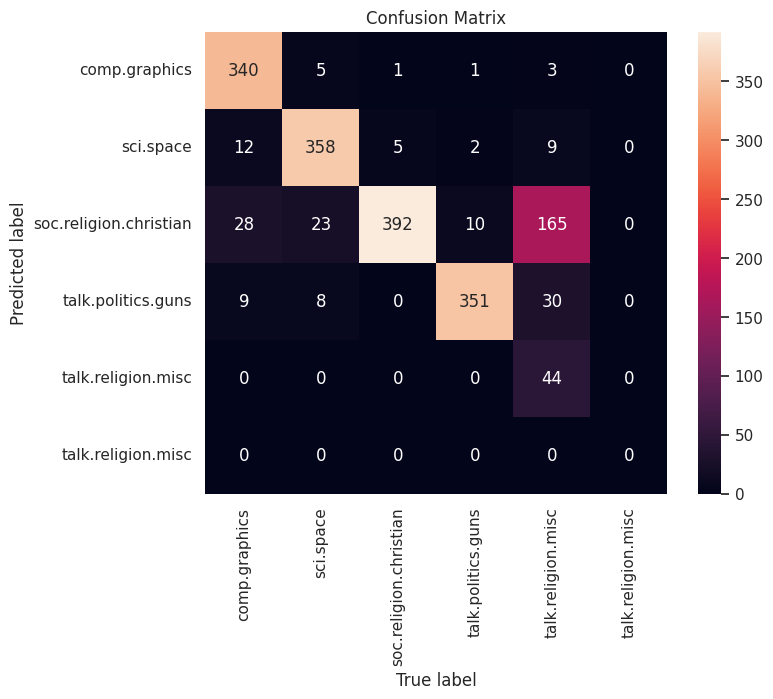

In [ ]:
#importing libraries
#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#machine learning importation
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.datasets import fetch_20newsgroups
from sklearn.metrics import classification_report
from sklearn.pipeline import make_pipeline

categories = ['talk.religion.misc', 'soc.religion.christian', 'talk.religion.misc','talk.politics.guns', 'sci.space','comp.graphics']
train_text_data = fetch_20newsgroups(subset = 'train', categories = categories)
testing_text_data = fetch_20newsgroups(subset = 'test', categories = categories)

train_text_data.target_names = fetch_20newsgroups(subset='all', categories=categories).target_names

pipeline_model = make_pipeline(TfidfVectorizer(), MultinomialNB())
pipeline_model.fit(train_text_data.data, train_text_data.target)
'''
a bit of discussion: so basically, the data is pure data, though it might have been
inserted into TfidfVectorizer, but it a list of data demonstrated above.

nevertheless, the target means the .target refers to the dependent variable,
also known as the response variable or outcome variable, that you are trying to
predict in a supervised learning task. It represents the ground truth or actual
values that the model is trained to learn. or basically the "y" factor

so basically, here's the whole explaination

.data
  - This contains the text data (the raw content of the newsgroup posts).

  - It is a list of strings, where each string is the full text of one document
 (newsgroup post).

.target
  - This contains the labels (the target categories) for each document.

  - It is a list or array of integers, where each integer is an index corresponding
to a category from the categories list you specified.
'''

'''
Next, let's talk about confusion matrix cuz we're going to discuss that, so it is
basically the table that represents prediction, or just a prediction summary in
matrix form.

The model performs well on comp.graphics and sci.space.

The model struggles to distinguish between soc.religion.christian and
talk.religion.misc. These two classes are getting mixed up — especially many
 soc.religion.christian samples are predicted as talk.religion.misc.

This may be due to semantic overlap in content between those categories or not
enough distinguishing features in the dataset.
'''

testing_text_data_prediction = pipeline_model.predict(testing_text_data.data)

from sklearn.metrics import confusion_matrix
labels = np.arange(len(train_text_data.target_names))
infos = confusion_matrix(testing_text_data.target, testing_text_data_prediction, labels=labels)

plt.figure(figsize=(8, 6))
sns.heatmap(infos.T, square = True, annot = True, fmt = 'd', cbar = True,
            xticklabels=train_text_data.target_names,
            yticklabels=train_text_data.target_names)
#Target_names is only for this

'''
In the field of machine learning and specifically the problem of statistical classification,
a confusion matrix, also known as error matrix, is a specific table layout that allows
visualization of the performance of an algorithm, typically a supervised learning one;
in unsupervised learning it is usually called a matching matrix.

Each row of the matrix represents the instances in an actual class while each column
represents the instances in a predicted class, or vice versa – both variants are found
in the literature. The diagonal of the matrix therefore represents all instances that
are correctly predicted. The name stems from the fact that it makes it easy to see whether
the system is confusing two classes (i.e. commonly mislabeling one as another).

It is a special kind of contingency table, with two dimensions ("actual" and "predicted"),
and identical sets of "classes" in both dimensions (each combination of dimension and
class is a variable in the contingency table).

basically this output of this heatmap there represents a confusion matrix which represents
the correltation between different liturature's correlations
'''

#.T meaning for transose, It swaps rows and columns — basically, it flips a
#matrix or 2D structure over its diagonal.
plt.xlabel('True label')
plt.ylabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

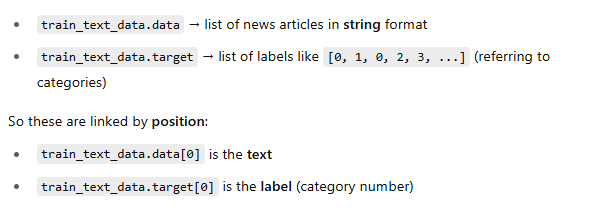